In [ ]:
!pip install numpy pandas seaborn matplotlib scikit-learn

In [60]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix



In [18]:
df = pd.read_csv('Dataset/Copy of sonar data.csv', header=None)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,0.301650,0.331250,0.351250,0.386175,0.452925,0.535725,0.659425,0.679050,0.731400,0.809325,0.816975,0.831975,0.848575,0.872175,0.873725,0.893800,0.917100,0.900275,0.852125,0.735175,0.641950,0.580300,0.556125,0.596125,0.593350,0.556525,0.518900,0.440550,0.434900,0.424350,0.387525,0.384250,0.324525,0.271750,0.231550,0.200375,0.154425,0.120100,0.0685

In [7]:
df.sample(5)

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
92,0.0459,0.0437,0.0347,0.0456,0.0067,0.0890,0.1798,0.1741,0.1598,0.1408,0.2693,0.3259,0.4545,0.5785,0.4471,0.2231,0.2164,0.3201,0.2915,0.4235,0.4460,0.2380,0.6415,0.8966,0.8918,0.7529,0.6838,0.8390,1.0000,0.8362,0.5427,0.4577,0.8067,0.6973,0.3915,0.1558,0.1598,0.2161,0.5178,0.4782,0.2344,0.3599,0.2785,0.1807,0.0352,0.0473,0.0322,0.0408,0.0163,0.0088,0.0121,0.0067,0.0032,0.0109,0.0164,0.0151,0.0070,0.0085,0.0117,0.0056,R
118,0.0261,0.0266,0.0223,0.0749,0.1364,0.1513,0.1316,0.1654,0.1864,0.2013,0.2890,0.3650,0.3510,0.3495,0.4325,0.5398,0.6237,0.6876,0.7329,0.8107,0.8396,0.8632,0.8747,0.9607,0.9716,0.9121,0.8576,0.8798,0.7720,0.5711,0.4264,0.2860,0.3114,0.2066,0.1165,0.0185,0.1302,0.2480,0.1637,0.1103,0.2144,0.2033,0.1887,0.1370,0.1376,0.0307,0.0373,0.0606,0.0399,0.0169,0.0135,0.0222,0.0175,0.0127,0.0022,0.0124,0.0054,0.0021,0.0028,0.0023,M
148,0.0207,0.0535,0.0334,0.0818,0.0740,0.0324,0.0918,0.1070,0.1553,0.1234,0.1796,0.1787,0.1247,0.2577,0.3370,0.3990,0.1647,0.2266,0.3219,0.5356,0.8159,1.0000,0.8701,0.6889,0.6299,0.5738,0.5707,0.5976,0.4301,0.2058,0.1000,0.2247,0.2308,0.3977,0.3317,0.1726,0.1429,0.2168,0.1967,0.2140,0.3674,0.2023,0.0778,0.0925,0.2388,0.3400,0.2594,0.1102,0.0911,0.0462,0.0171,0.0033,0.0050,0.0190,0.0103,0.0121,0.0042,0.0090,0.0070,0.0099,M
57,0.0225,0.0019,0.0075,0.0097,0.0445,0.0906,0.0889,0.0655,0.1624,0.1452,0.1442,0.0948,0.0618,0.1641,0.0708,0.0844,0.2590,0.2679,0.3094,0.4678,0.5958,0.7245,0.8773,0.9214,0.9282,0.9942,1.0000,0.9071,0.8545,0.7293,0.6499,0.6071,0.5588,0.5967,0.6275,0.5459,0.4786,0.3965,0.2087,0.1651,0.1836,0.0652,0.0758,0.0486,0.0353,0.0297,0.0241,0.0379,0.0119,0.0073,0.0051,0.0034,0.0129,0.0100,0.0044,0.0057,0.0030,0.0035,0.0021,0.0027,R
72,0.0139,0.0222,0.0089,0.0108,0.0215,0.0136,0.0659,0.0954,0.0786,0.1015,0.1261,0.0828,0.0493,0.0848,0.1514,0.1396,0.1066,0.1923,0.2991,0.3247,0.3797,0.5658,0.7483,0.8757,0.9048,0.7511,0.6858,0.7043,0.5864,0.3773,0.2206,0.2628,0.2672,0.2907,0.1982,0.2288,0.3186,0.2871,0.2921,0.2806,0.2682,0.2112,0.1513,0.1789,0.1850,0.1717,0.0898,0.0656,0.0445,0.0110,0.0024,0.0062,0.0072,0.0113,0.0012,0.0022,0.0025,0.0059,0.0039,0.0048,R


In [19]:
df.groupby(df[60]).mean()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,0.289581,0.301459,0.314426,0.320692,0.331182,0.380999,0.415007,0.455882,0.538062,0.617941,0.667426,0.672325,0.676701,0.689165,0.681204,0.706075,0.714754,0.712269,0.650283,0.581796,0.482378,0.428049,0.396577,0.36614,0.337553,0.318553,0.317034,0.331608,0.336365,0.305221,0.292594,0.300975,0.276883,0.248106,0.245225,0.198804,0.146917,0.110594,0.063708,0.022721,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,0.174713,0.191589,0.226249,0.268963,0.307636,0.375611,0.417100,0.448240,0.466762,0.500229,0.542270,0.569290,0.612959,0.653761,0.668809,0.692762,0.687737,0.673145,0.632680,0.579934,0.529762,0.451619,0.440841,0.44568,0.455530,0.460710,0.417330,0.348868,0.313709,0.318057,0.285428,0.252338,0.211822,0.175132,0.142312,0.116949,0.094458,0.069488,0.038449,0.017796,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [21]:
x = df.drop(columns=60,axis=1)
y = df[60]


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Logistic Regression
Accuracy: 0.7857142857142857
              precision    recall  f1-score   support

           M       0.90      0.73      0.81        26
           R       0.67      0.88      0.76        16

    accuracy                           0.79        42
   macro avg       0.79      0.80      0.78        42
weighted avg       0.81      0.79      0.79        42



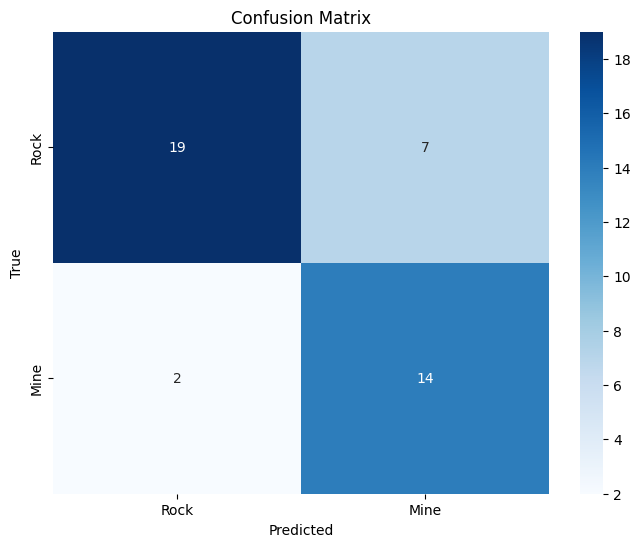

In [39]:
# Model 1: Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
x_pred = lr.predict(x_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, x_pred))
print(classification_report(y_test, x_pred))

cm1 = confusion_matrix(y_test, x_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=['Rock', 'Mine'], yticklabels=['Rock', 'Mine'])
plt.xlabel('Predicted') 
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Random Forest Classifier
Accuraccy :  0.8333333333333334
              precision    recall  f1-score   support

           M       0.95      0.77      0.85        26
           R       0.71      0.94      0.81        16

    accuracy                           0.83        42
   macro avg       0.83      0.85      0.83        42
weighted avg       0.86      0.83      0.84        42



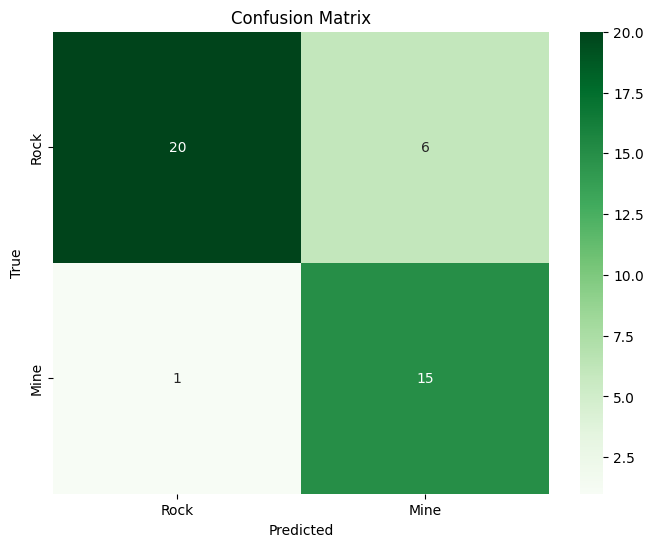

In [40]:
# Model 2: Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred= rf.predict(x_test)
print("Random Forest Classifier")
print("Accuraccy : ",accuracy_score(y_pred,y_test))
print(classification_report(y_test,y_pred))

cm2 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens', xticklabels=['Rock', 'Mine'], yticklabels=['Rock', 'Mine'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Naive Bayes
Accuracy:  0.8333333333333334
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        26
           1       0.76      0.81      0.79        16

    accuracy                           0.83        42
   macro avg       0.82      0.83      0.83        42
weighted avg       0.84      0.83      0.83        42



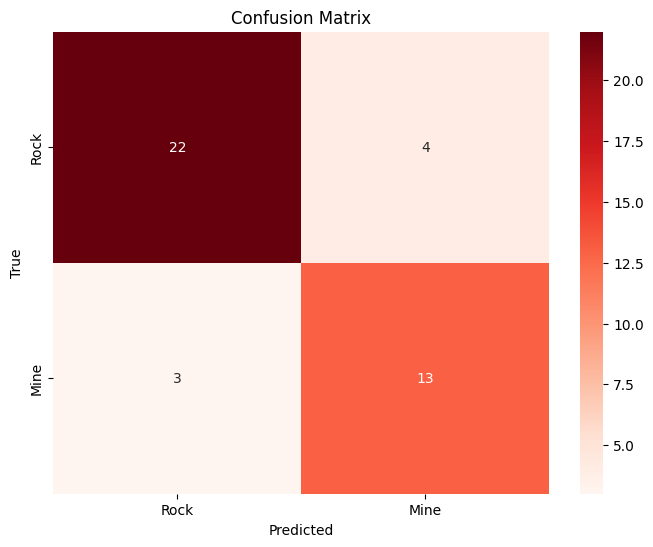

In [47]:
# Model 3: Naive Bayes
le = LabelEncoder()
y_new = le.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y_new, test_size=0.2, random_state=42)

nb = MultinomialNB()
nb.fit(x_train,y_train)
y_predict = nb.predict(x_test)
print("Naive Bayes")
print("Accuracy: ",accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))
cm3 = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Reds', xticklabels=['Rock', 'Mine'], yticklabels=['Rock', 'Mine'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()